 Proyek Analisis Data: [Air_Quality_Dataset]
- **Nama:** [Nurul alam]
- **Email:** [iyungalam5@gmail.com]
- **ID Dicoding:** [https://www.dicoding.com/users/iyungalam]

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbedaan tingkat polutan di berbagai stasiun?
- Pertanyaan 2 : Korelasi antara suhu,kecepatan angin pada tingkat polutan ( SO2, NO2, CO2, O3 )
- Pertanyaan 3 : Tingkat curah hujan berdasarkan stasiun
- Pertanyaan 4 : Pada stasiun mana suhu mencapai derajat terendah dan tertingginya?

# Import Semua Packages/Library yang Digunakan

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
Aotizhongxin_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv", delimiter=",")
Changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv", delimiter=",")
Dingling_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv", delimiter=",")
Dongsi_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv", delimiter=",")
Guanyuan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")
Gucheng_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv", delimiter=",")
Huairou_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv", delimiter=",")
Nongzhanguan_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv", delimiter=",")
Shunyi_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv", delimiter=",")
Tiantan_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv", delimiter=",")
Wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv", delimiter=",")
Wanshouxigong_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv", delimiter=",")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
#Menghapus tabel yang tidak dibutuhkan untuk analisis
dataframes = [Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df, Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df, Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df]
columns_to_drop = ['No', 'PRES', 'wd', 'PM2.5', 'PM10', 'DEWP',]

for df in dataframes:
    df.drop(columns=columns_to_drop, inplace=True)

#Membuat dateframe
datasets = [Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df, Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df, Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df]
for data in datasets:
    data['Date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
    data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

Aotizhongxin_df.head()

,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
0,4.0,7.0,300.0,77.0,-0.7,0.0,4.4,Aotizhongxin,2013-03-01 00:00:00
1,4.0,7.0,300.0,77.0,-1.1,0.0,4.7,Aotizhongxin,2013-03-01 01:00:00
2,5.0,10.0,300.0,73.0,-1.1,0.0,5.6,Aotizhongxin,2013-03-01 02:00:00
3,11.0,11.0,300.0,72.0,-1.4,0.0,3.1,Aotizhongxin,2013-03-01 03:00:00
4,12.0,12.0,300.0,72.0,-2.0,0.0,2.0,Aotizhongxin,2013-03-01 04:00:00


## Assessing Data

### **Mengecek Data WIlayah Aotizhongxin_df**

In [4]:
#mengecek tipe data
Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34129 non-null  float64       
 1   NO2      34041 non-null  float64       
 2   CO       33288 non-null  float64       
 3   O3       33345 non-null  float64       
 4   TEMP     35044 non-null  float64       
 5   RAIN     35044 non-null  float64       
 6   WSPM     35050 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [5]:
#mengcek missing value
Aotizhongxin_df.isna().sum()

,0
SO2,935
NO2,1023
CO,1776
O3,1719
TEMP,20
RAIN,20
WSPM,14
station,0
Date,0




> terdapat banyak data missing value



In [6]:
#mengecek data duplicate
print("Jumlah duplikasi: ", Aotizhongxin_df.duplicated().sum())
Aotizhongxin_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,17.375901,59.305833,1262.945145,56.353358,13.584607,0.067421,1.708496,NaN,2015-03-01 11:30:00
min,0.285600,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,3.000000,30.000000,500.000000,8.000000,3.100000,0.000000,0.900000,NaN,2014-03-01 05:45:00
50%,9.000000,53.000000,900.000000,42.000000,14.500000,0.000000,1.400000,NaN,2015-03-01 11:30:00
75%,21.000000,82.000000,1500.000000,82.000000,23.300000,0.000000,2.200000,NaN,2016-02-29 17:15:00
max,341.000000,290.000000,10000.000000,423.000000,40.500000,72.500000,11.200000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Changping_df

In [7]:
Changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34436 non-null  float64       
 1   NO2      34397 non-null  float64       
 2   CO       33543 non-null  float64       
 3   O3       34460 non-null  float64       
 4   TEMP     35011 non-null  float64       
 5   RAIN     35013 non-null  float64       
 6   WSPM     35021 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [8]:
Changping_df.isna().sum()

,0
SO2,628
NO2,667
CO,1521
O3,604
TEMP,53
RAIN,51
WSPM,43
station,0
Date,0


In [9]:
print("Jumlah duplikasi: ", Changping_df.duplicated().sum())
Changping_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35013.000000,35021.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changping,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,14.958906,44.182086,1152.301345,57.940003,13.686111,0.060366,1.853836,NaN,2015-03-01 11:30:00
min,0.285600,1.847700,100.000000,0.214200,-16.600000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,2.000000,22.000000,500.000000,15.636600,3.400000,0.000000,1.000000,NaN,2014-03-01 05:45:00
50%,7.000000,36.000000,800.000000,46.000000,14.700000,0.000000,1.500000,NaN,2015-03-01 11:30:00
75%,18.000000,60.358200,1400.000000,80.000000,23.300000,0.000000,2.300000,NaN,2016-02-29 17:15:00
max,310.000000,226.000000,10000.000000,429.000000,41.400000,52.100000,10.000000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Dingling_df

In [10]:
Dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34334 non-null  float64       
 1   NO2      33830 non-null  float64       
 2   CO       33052 non-null  float64       
 3   O3       33850 non-null  float64       
 4   TEMP     35011 non-null  float64       
 5   RAIN     35013 non-null  float64       
 6   WSPM     35021 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [11]:
Dingling_df.isna().sum()

,0
SO2,730
NO2,1234
CO,2012
O3,1214
TEMP,53
RAIN,51
WSPM,43
station,0
Date,0


In [12]:
print("Jumlah duplikasi: ", Dingling_df.duplicated().sum())
Dingling_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35013.000000,35021.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,11.749650,27.585467,904.896073,68.548371,13.686111,0.060366,1.853836,NaN,2015-03-01 11:30:00
min,0.285600,1.026500,100.000000,0.214200,-16.600000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,2.000000,9.000000,300.000000,31.000000,3.400000,0.000000,1.000000,NaN,2014-03-01 05:45:00
50%,5.000000,19.000000,600.000000,61.000000,14.700000,0.000000,1.500000,NaN,2015-03-01 11:30:00
75%,15.000000,38.000000,1200.000000,90.000000,23.300000,0.000000,2.300000,NaN,2016-02-29 17:15:00
max,156.000000,205.000000,10000.000000,500.000000,41.400000,52.100000,10.000000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Dongsi_df

In [13]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34401 non-null  float64       
 1   NO2      33463 non-null  float64       
 2   CO       31867 non-null  float64       
 3   O3       34400 non-null  float64       
 4   TEMP     35044 non-null  float64       
 5   RAIN     35044 non-null  float64       
 6   WSPM     35050 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [14]:
Dongsi_df.isna().sum()

,0
SO2,663
NO2,1601
CO,3197
O3,664
TEMP,20
RAIN,20
WSPM,14
station,0
Date,0


In [15]:
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())
Dongsi_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dongsi,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,18.531107,53.699443,1330.069131,57.210637,13.671490,0.064020,1.860785,NaN,2015-03-01 11:30:00
min,0.285600,2.000000,100.000000,0.642600,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,4.000000,27.000000,600.000000,12.000000,3.100000,0.000000,1.000000,NaN,2014-03-01 05:45:00
50%,10.000000,47.000000,1000.000000,44.125200,14.600000,0.000000,1.500000,NaN,2015-03-01 11:30:00
75%,24.000000,73.000000,1700.000000,81.000000,23.500000,0.000000,2.400000,NaN,2016-02-29 17:15:00
max,300.000000,258.000000,10000.000000,1071.000000,41.100000,46.400000,10.500000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Guanyuan_df

In [16]:
Guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34590 non-null  float64       
 1   NO2      34405 non-null  float64       
 2   CO       33311 non-null  float64       
 3   O3       33891 non-null  float64       
 4   TEMP     35044 non-null  float64       
 5   RAIN     35044 non-null  float64       
 6   WSPM     35050 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [17]:
Guanyuan_df.isna().sum()

,0
SO2,474
NO2,659
CO,1753
O3,1173
TEMP,20
RAIN,20
WSPM,14
station,0
Date,0


In [18]:
print("Jumlah duplikasi: ", Guanyuan_df.duplicated().sum())
Guanyuan_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,17.590941,57.901643,1271.294377,55.795044,13.584607,0.067421,1.708496,NaN,2015-03-01 11:30:00
min,1.000000,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,3.000000,31.000000,500.000000,7.000000,3.100000,0.000000,0.900000,NaN,2014-03-01 05:45:00
50%,8.000000,51.000000,900.000000,41.000000,14.500000,0.000000,1.400000,NaN,2015-03-01 11:30:00
75%,22.000000,78.000000,1600.000000,81.000000,23.300000,0.000000,2.200000,NaN,2016-02-29 17:15:00
max,293.000000,270.000000,10000.000000,415.000000,40.500000,72.500000,11.200000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Gucheng_df

In [19]:
Gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34557 non-null  float64       
 1   NO2      34396 non-null  float64       
 2   CO       33663 non-null  float64       
 3   O3       34335 non-null  float64       
 4   TEMP     35013 non-null  float64       
 5   RAIN     35021 non-null  float64       
 6   WSPM     35022 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [20]:
Gucheng_df.isna().sum()

,0
SO2,507
NO2,668
CO,1401
O3,729
TEMP,51
RAIN,43
WSPM,42
station,0
Date,0


In [21]:
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())
Gucheng_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35021.000000,35022.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,15.366162,55.871075,1323.974423,57.694879,13.864524,0.064453,1.343310,NaN,2015-03-01 11:30:00
min,0.285600,2.000000,100.000000,0.214200,-15.600000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,2.000000,26.000000,600.000000,10.000000,3.600000,0.000000,0.600000,NaN,2014-03-01 05:45:00
50%,7.000000,50.000000,900.000000,45.000000,14.800000,0.000000,1.000000,NaN,2015-03-01 11:30:00
75%,20.000000,79.000000,1600.000000,83.000000,23.500000,0.000000,1.800000,NaN,2016-02-29 17:15:00
max,500.000000,276.000000,10000.000000,450.000000,41.600000,41.900000,12.000000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Huairou_df

In [22]:
Huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34084 non-null  float64       
 1   NO2      33425 non-null  float64       
 2   CO       33642 non-null  float64       
 3   O3       33913 non-null  float64       
 4   TEMP     35013 non-null  float64       
 5   RAIN     35009 non-null  float64       
 6   WSPM     35015 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [23]:
Huairou_df.isna().sum()

,0
SO2,980
NO2,1639
CO,1422
O3,1151
TEMP,51
RAIN,55
WSPM,49
station,0
Date,0


In [24]:
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())
Huairou_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35009.000000,35015.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huairou,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,12.121553,32.497250,1022.554545,59.824713,12.445426,0.067940,1.652021,NaN,2015-03-01 11:30:00
min,0.285600,1.026500,100.000000,0.214200,-19.900000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,2.000000,12.000000,400.000000,18.000000,2.100000,0.000000,0.900000,NaN,2014-03-01 05:45:00
50%,4.000000,25.000000,800.000000,49.000000,13.600000,0.000000,1.300000,NaN,2015-03-01 11:30:00
75%,14.000000,46.000000,1300.000000,83.000000,22.300000,0.000000,2.000000,NaN,2016-02-29 17:15:00
max,315.000000,231.000000,10000.000000,444.000000,40.300000,45.900000,12.900000,NaN,2017-02-28 23:00:00


### Mengecek Data Wilayah Nongzhanguan_df

In [25]:
Nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34618 non-null  float64       
 1   NO2      34372 non-null  float64       
 2   CO       33858 non-null  float64       
 3   O3       34558 non-null  float64       
 4   TEMP     35044 non-null  float64       
 5   RAIN     35044 non-null  float64       
 6   WSPM     35050 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [26]:
Nongzhanguan_df.isna().sum()

,0
SO2,446
NO2,692
CO,1206
O3,506
TEMP,20
RAIN,20
WSPM,14
station,0
Date,0


In [27]:
print("Jumlah duplikasi: ", Nongzhanguan_df.duplicated().sum())
Nongzhanguan_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nongzhanguan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,18.689242,58.097172,1324.350198,58.534682,13.671490,0.064020,1.860785,NaN,2015-03-01 11:30:00
min,0.571200,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,3.000000,29.000000,500.000000,10.000000,3.100000,0.000000,1.000000,NaN,2014-03-01 05:45:00
50%,9.000000,51.000000,900.000000,45.000000,14.600000,0.000000,1.500000,NaN,2015-03-01 11:30:00
75%,23.000000,80.000000,1600.000000,84.000000,23.500000,0.000000,2.400000,NaN,2016-02-29 17:15:00
max,257.000000,273.000000,10000.000000,390.000000,41.100000,46.400000,10.500000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Shunyi_df

In [28]:
Shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      33768 non-null  float64       
 1   NO2      33699 non-null  float64       
 2   CO       32886 non-null  float64       
 3   O3       33575 non-null  float64       
 4   TEMP     35013 non-null  float64       
 5   RAIN     35013 non-null  float64       
 6   WSPM     35020 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [29]:
Shunyi_df.isna().sum()

,0
SO2,1296
NO2,1365
CO,2178
O3,1489
TEMP,51
RAIN,51
WSPM,44
station,0
Date,0


In [30]:
print("Jumlah duplikasi: ", Shunyi_df.duplicated().sum())
Shunyi_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35020.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,13.572039,43.908865,1187.063979,55.201321,13.387969,0.061094,1.807533,NaN,2015-03-01 11:30:00
min,0.285600,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,2.000000,19.000000,400.000000,10.000000,3.000000,0.000000,1.000000,NaN,2014-03-01 05:45:00
50%,5.000000,37.000000,800.000000,43.000000,14.400000,0.000000,1.500000,NaN,2015-03-01 11:30:00
75%,17.000000,62.000000,1500.000000,77.000000,23.200000,0.000000,2.300000,NaN,2016-02-29 17:15:00
max,239.000000,258.000000,10000.000000,351.716400,40.600000,37.300000,12.800000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Tiantan_df

In [31]:
Tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      33946 non-null  float64       
 1   NO2      34320 non-null  float64       
 2   CO       33938 non-null  float64       
 3   O3       34221 non-null  float64       
 4   TEMP     35044 non-null  float64       
 5   RAIN     35044 non-null  float64       
 6   WSPM     35050 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [32]:
Tiantan_df.isna().sum()

,0
SO2,1118
NO2,744
CO,1126
O3,843
TEMP,20
RAIN,20
WSPM,14
station,0
Date,0


In [33]:
print("Jumlah duplikasi: ", Tiantan_df.duplicated().sum())
Tiantan_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tiantan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,14.367615,53.162646,1298.303318,55.984297,13.671490,0.064020,1.860785,NaN,2015-03-01 11:30:00
min,0.571200,2.000000,100.000000,0.428400,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,3.000000,28.000000,500.000000,8.000000,3.100000,0.000000,1.000000,NaN,2014-03-01 05:45:00
50%,7.000000,47.000000,900.000000,40.000000,14.600000,0.000000,1.500000,NaN,2015-03-01 11:30:00
75%,17.000000,71.000000,1600.000000,81.000000,23.500000,0.000000,2.400000,NaN,2016-02-29 17:15:00
max,273.000000,241.000000,10000.000000,674.000000,41.100000,46.400000,10.500000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Wanliu_df

In [34]:
Wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34489 non-null  float64       
 1   NO2      33994 non-null  float64       
 2   CO       33252 non-null  float64       
 3   O3       32957 non-null  float64       
 4   TEMP     35044 non-null  float64       
 5   RAIN     35044 non-null  float64       
 6   WSPM     35050 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [35]:
Wanliu_df.isna().sum()

,0
SO2,575
NO2,1070
CO,1812
O3,2107
TEMP,20
RAIN,20
WSPM,14
station,0
Date,0


In [36]:
print("Jumlah duplikasi: ", Wanliu_df.duplicated().sum())
Wanliu_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wanliu,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,18.376481,65.258789,1319.353513,48.873614,13.428865,0.068263,1.501215,NaN,2015-03-01 11:30:00
min,0.285600,1.642400,100.000000,0.214200,-15.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,4.000000,36.000000,500.000000,4.000000,3.200000,0.000000,0.800000,NaN,2014-03-01 05:45:00
50%,10.000000,60.000000,900.000000,32.000000,14.300000,0.000000,1.200000,NaN,2015-03-01 11:30:00
75%,23.000000,88.000000,1600.000000,73.000000,22.900000,0.000000,2.000000,NaN,2016-02-29 17:15:00
max,282.000000,264.000000,10000.000000,364.000000,40.500000,72.500000,11.200000,NaN,2017-02-28 23:00:00


### Mengecek Data WIlayah Wanshouxigong_df

In [37]:
Wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      34395 non-null  float64       
 1   NO2      34310 non-null  float64       
 2   CO       33767 non-null  float64       
 3   O3       33986 non-null  float64       
 4   TEMP     35045 non-null  float64       
 5   RAIN     35045 non-null  float64       
 6   WSPM     35051 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [38]:
Wanshouxigong_df.isna().sum()

,0
SO2,669
NO2,754
CO,1297
O3,1078
TEMP,19
RAIN,19
WSPM,13
station,0
Date,0


In [39]:
print("Jumlah duplikasi: ", Wanshouxigong_df.duplicated().sum())
Wanshouxigong_df.describe(include="all")

Jumlah duplikasi:  0


,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35051.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,17.148603,55.52956,1370.395031,56.229904,13.784477,0.064320,1.745314,NaN,2015-03-01 11:30:00
min,0.285600,2.00000,100.000000,0.214200,-16.800000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,3.000000,28.00000,600.000000,8.000000,3.400000,0.000000,0.900000,NaN,2014-03-01 05:45:00
50%,8.000000,49.00000,1000.000000,42.000000,14.800000,0.000000,1.400000,NaN,2015-03-01 11:30:00
75%,21.000000,77.00000,1700.000000,82.000000,23.500000,0.000000,2.300000,NaN,2016-02-29 17:15:00
max,411.000000,251.00000,9800.000000,358.000000,40.600000,46.400000,13.200000,NaN,2017-02-28 23:00:00




### > dari 12 data stasiun, permasalahan utamanya sama yakni terdapat banyak data missing value



## Cleaning Data

### Membersihkan data Aotizhongxin_df

In [40]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Aotizhongxin_df[columns_to_fill] = Aotizhongxin_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)
Aotizhongxin_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Changping_df

In [41]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Changping_df[columns_to_fill] = Changping_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Changping_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Dingling_df

In [42]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP',  'RAIN', 'WSPM']
Dingling_df[columns_to_fill] = Dingling_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Dingling_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Dongsi_df

In [43]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Dongsi_df[columns_to_fill] = Dongsi_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Dongsi_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Guanyuan_df

In [44]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Guanyuan_df[columns_to_fill] = Guanyuan_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Guanyuan_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


In [45]:
Guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SO2      35064 non-null  float64       
 1   NO2      35064 non-null  float64       
 2   CO       35064 non-null  float64       
 3   O3       35064 non-null  float64       
 4   TEMP     35064 non-null  float64       
 5   RAIN     35064 non-null  float64       
 6   WSPM     35064 non-null  float64       
 7   station  35064 non-null  object        
 8   Date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


### Membersihkan data Gucheng_df

In [46]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Gucheng_df[columns_to_fill] = Gucheng_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Gucheng_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Huairou_df

In [47]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Huairou_df[columns_to_fill] = Huairou_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Huairou_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Nongzhanguan_df

In [48]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP',  'RAIN', 'WSPM']
Nongzhanguan_df[columns_to_fill] = Nongzhanguan_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Nongzhanguan_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Shunyi_df

In [49]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP',  'RAIN', 'WSPM']
Shunyi_df[columns_to_fill] = Shunyi_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Shunyi_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Tiantan_df

In [50]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Tiantan_df[columns_to_fill] = Tiantan_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Tiantan_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Wanliu_df

In [51]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Wanliu_df[columns_to_fill] = Wanliu_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Wanliu_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


### Membersihkan data Wanshouxigong_df

In [52]:
columns_to_fill = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']
Wanshouxigong_df[columns_to_fill] = Wanshouxigong_df[columns_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

Wanshouxigong_df.isna().sum()

,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
RAIN,0
WSPM,0
station,0
Date,0


# Exploratory Data Analysis (EDA)

## Explore

In [53]:
#mengabungkan semua data
df = [Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df, Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df, Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df]
all_df = pd.concat(df)

all_df.head()

,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
0,4.0,7.0,300.0,77.0,-0.7,0.0,4.4,Aotizhongxin,2013-03-01 00:00:00
1,4.0,7.0,300.0,77.0,-1.1,0.0,4.7,Aotizhongxin,2013-03-01 01:00:00
2,5.0,10.0,300.0,73.0,-1.1,0.0,5.6,Aotizhongxin,2013-03-01 02:00:00
3,11.0,11.0,300.0,72.0,-1.4,0.0,3.1,Aotizhongxin,2013-03-01 03:00:00
4,12.0,12.0,300.0,72.0,-2.0,0.0,2.0,Aotizhongxin,2013-03-01 04:00:00


In [54]:
#melihat data
all_df.describe(include='all')

,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,station,Date
count,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064,NaN
mean,15.820683,50.583319,1230.62509,57.349235,13.538931,0.064475,1.729701,NaN,2015-03-01 11:30:00.000001024
min,0.285600,1.026500,100.00000,0.214200,-19.900000,0.000000,0.000000,NaN,2013-03-01 00:00:00
25%,3.000000,24.000000,500.00000,12.000000,3.100000,0.000000,0.900000,NaN,2014-03-01 05:45:00
50%,8.000000,44.000000,900.00000,47.000000,14.500000,0.000000,1.400000,NaN,2015-03-01 11:30:00
75%,19.000000,70.000000,1500.00000,80.000000,23.200000,0.000000,2.200000,NaN,2016-02-29 17:15:00
max,500.000000,290.000000,10000.00000,1071.000000,41.600000,72.500000,13.200000,NaN,2017-02-28 23:00:00




> - Data terdiri dari 12 stasiun dengan nilai top pada stasiun Aotizhongxin
- kadar so2 tertinggi di angka 500
- Kadar no2 tertinggu di angka 290
- kadar co tertinggi di angka 10000
- kadar o3 tertinggi di angka 1071
- Temparatur tertinggi di angka 41^C dan terendah di angka -19^C
- curah hujan tertinggi mencapai 72,5mm dengan kecepatan angin 13,2






In [55]:
all_df.groupby(by="station").agg({
    "RAIN": ["max", "min"],
})

RAIN     
                max  min
station                 
Aotizhongxin   72.5  0.0
Changping      52.1  0.0
Dingling       52.1  0.0
Dongsi         46.4  0.0
Guanyuan       72.5  0.0
Gucheng        41.9  0.0
Huairou        45.9  0.0
Nongzhanguan   46.4  0.0
Shunyi         37.3  0.0
Tiantan        46.4  0.0
Wanliu         72.5  0.0
Wanshouxigong  46.4  0.0



> Curah hujan tertinggi di stasiun wanliu,Guanyuan, dan Aotizhongxin



In [56]:
all_df.groupby(by="station").agg({
    "TEMP": ["max", "min"],
})

TEMP      
                max   min
station                  
Aotizhongxin   40.5 -16.8
Changping      41.4 -16.6
Dingling       41.4 -16.6
Dongsi         41.1 -16.8
Guanyuan       40.5 -16.8
Gucheng        41.6 -15.6
Huairou        40.3 -19.9
Nongzhanguan   41.1 -16.8
Shunyi         40.6 -16.8
Tiantan        41.1 -16.8
Wanliu         40.5 -15.8
Wanshouxigong  40.6 -16.8



> Suhu tertinggi pada stasiun Gucheng dengan suhu mencapai 41,6^C dan suhu terendah pada stasiun Huairou dengan suhu -19.9^C



In [57]:
all_df.groupby(by="station").agg({
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"]
})

,SO2,NO2,CO,O3
,mean,mean,mean,mean
station,,,,
Aotizhongxin,17.375901,59.305833,1262.945145,56.353358
Changping,14.958906,44.182086,1152.301345,57.940003
Dingling,11.749650,27.585467,904.896073,68.548371
Dongsi,18.531107,53.699443,1330.069131,57.210637
Guanyuan,17.590941,57.901643,1271.294377,55.795044
Gucheng,15.366162,55.871075,1323.974423,57.694879
Huairou,12.121553,32.497250,1022.554545,59.824713
Nongzhanguan,18.689242,58.097172,1324.350198,58.534682


In [58]:
pollutant_mean = all_df.groupby(by="station").agg({
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"]
})

pollutant_mean['kadar_polusi'] = pollutant_mean.mean(axis=1)

print(pollutant_mean)

                     SO2        NO2           CO         O3 kadar_polusi
                    mean       mean         mean       mean             
station                                                                 
Aotizhongxin   17.375901  59.305833  1262.945145  56.353358   348.995060
Changping      14.958906  44.182086  1152.301345  57.940003   317.345585
Dingling       11.749650  27.585467   904.896073  68.548371   253.194890
Dongsi         18.531107  53.699443  1330.069131  57.210637   364.877579
Guanyuan       17.590941  57.901643  1271.294377  55.795044   350.645501
Gucheng        15.366162  55.871075  1323.974423  57.694879   363.226635
Huairou        12.121553  32.497250  1022.554545  59.824713   281.749515
Nongzhanguan   18.689242  58.097172  1324.350198  58.534682   364.917824
Shunyi         13.572039  43.908865  1187.063979  55.201321   324.936551
Tiantan        14.367615  53.162646  1298.303318  55.984297   355.454469
Wanliu         18.376481  65.258789  1319.353513  4



> kadar polusi tertinggi pada stasiun Wanshouxigong



# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana perbedaan tingkat polutan di berbagai stasiun?

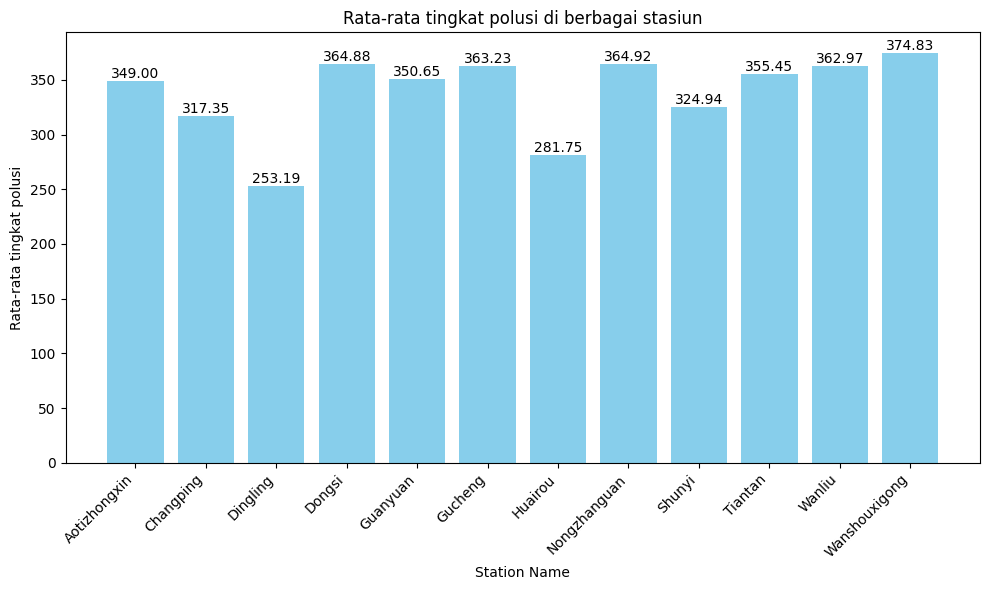

In [59]:
# Data yang diperlukan
stations = pollutant_mean.index
mean_pollutant_levels = pollutant_mean['kadar_polusi']

plt.figure(figsize=(10, 6))

# Membuat bar chart
bars = plt.bar(stations, mean_pollutant_levels, color='skyblue')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Menambahkan label dan judul
plt.xlabel('Station Name')
plt.ylabel('Rata-rata tingkat polusi')
plt.title('Rata-rata tingkat polusi di berbagai stasiun')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



> Tingkat Polusi Tertinggi Pada Stasiun Wanshouxigong dengan nilai rata-rata polusi sebesar 374.83







## Pertanyaan 2 : Korelasi antara suhu,kecepatan angin pada tingkat polutan ( SO2, NO2, CO2, O3 )

In [60]:
all_df.corr(method= 'spearman', numeric_only=True)

,SO2,NO2,CO,O3,TEMP,RAIN,WSPM
SO2,1.000000,0.521410,0.562766,-0.207793,-0.353773,-0.146213,-0.066022
NO2,0.521410,1.000000,0.718622,-0.602805,-0.267469,-0.068996,-0.434028
CO,0.562766,0.718622,1.000000,-0.436786,-0.220199,0.007693,-0.374695
O3,-0.207793,-0.602805,-0.436786,1.000000,0.570453,-0.009696,0.417689
TEMP,-0.353773,-0.267469,-0.220199,0.570453,1.000000,0.037950,0.101914
RAIN,-0.146213,-0.068996,0.007693,-0.009696,0.037950,1.000000,-0.020485
WSPM,-0.066022,-0.434028,-0.374695,0.417689,0.101914,-0.020485,1.000000


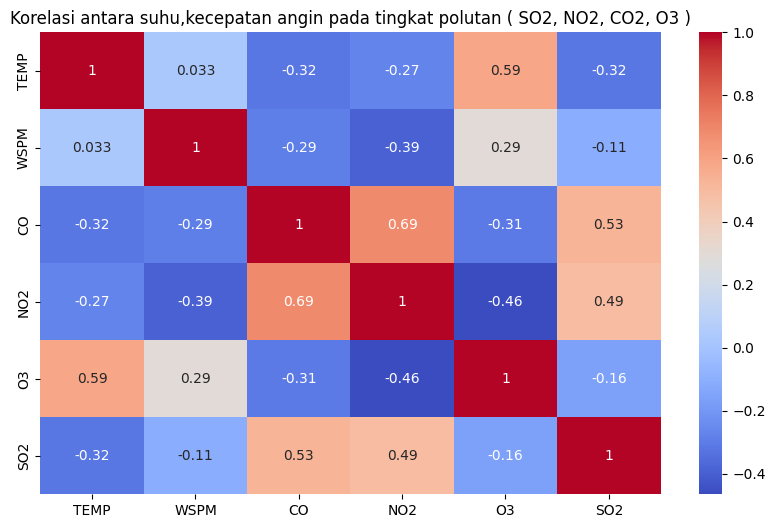

In [61]:
# 2. Korelasi antara suhu dan tingkat polutan
plt.figure(figsize=(10, 6))
# Define the pollutants variable as a list of strings
pollutants = ['CO', 'NO2', 'O3','SO2',] # Example list of pollutants, replace with your actual pollutants
corr_matrix = all_df[['TEMP', 'WSPM', ] + pollutants].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara suhu,kecepatan angin pada tingkat polutan ( SO2, NO2, CO2, O3 )')
plt.show()



> - Terdapat korelasi antara Temp dengan O3 sebesar 0.59
- Terdapat korelasi antara wspm dengan O3 sebesar 0.29
- Terdapat korelasi signifikan antara CO dengan NO2 sebesar 0.69 dan SO2 sebesar 0.53
- Terdapat korelasi signifikan antara NO2 dengan CO sebesar 0.69 dan SO2 sebesar 0.49
- Terdapat korelasi antara O3 dengan temp sebesar 0.59 dan wspm 0.29
- Terdapat Korelasi antara SO2 dengan NO2 sebesar 0.49 dan CO sebesar 0.53



## Pertanyaan 3 : Tingkat curah hujan berdasarkan stasiun

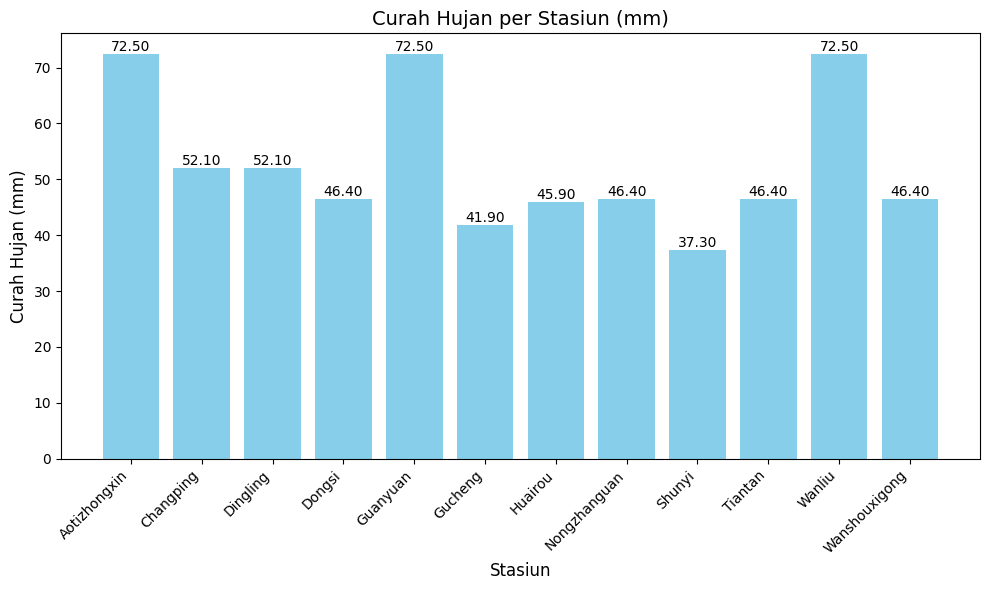

In [62]:
# Menghitung nilai maksimum per stasiun
volume_mean = all_df.groupby(by="station").agg({
    "RAIN": ["max", "min"],
})

stations = volume_mean.index
max_rain_levels = volume_mean['RAIN']['max']

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(stations, max_rain_levels, color='skyblue', label='Max Rain')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Curah Hujan per Stasiun (mm)', fontsize=14)
plt.ylabel('Curah Hujan (mm)', fontsize=12)
plt.xlabel('Stasiun', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



> Tingkat Curah hujan Tertinggi berada pada stasiun Aotizhoungxin,Guanyuan, dan Wanliu



## Pertanyaan 4 : Pada stasiun mana suhu mencapai derajat terendah dan tertingginya?

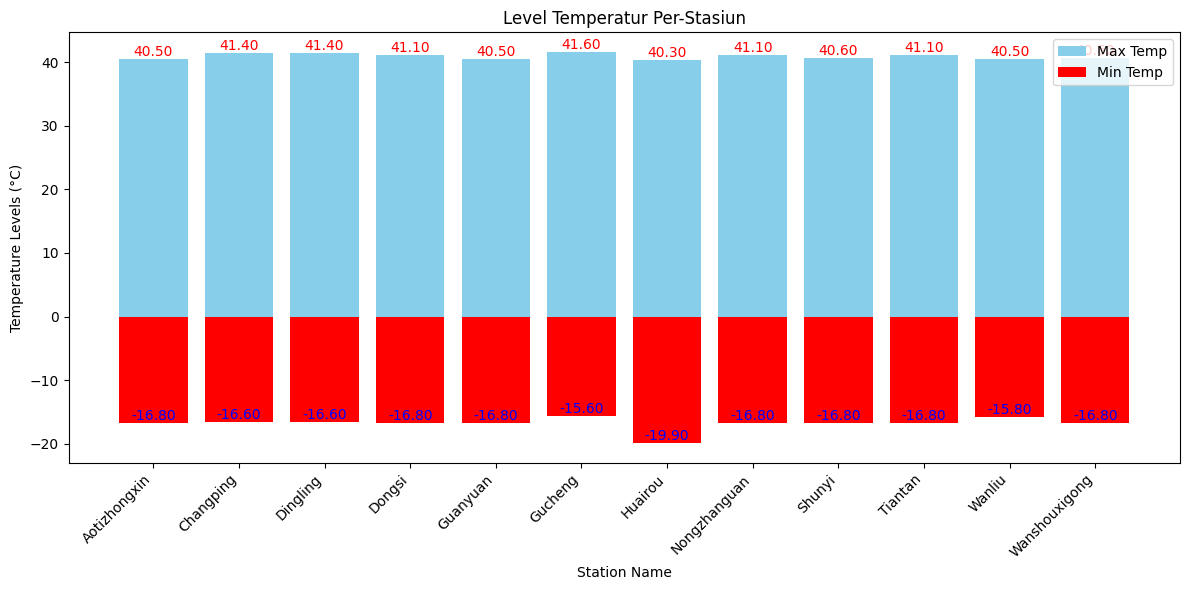

In [63]:
# Menghitung nilai maksimum dan minimum per stasiun
Temparatur = all_df.groupby(by="station").agg({
    "TEMP": ["max", "min"],
})

stations_Temp = Temparatur.index
max_temp_levels = Temparatur['TEMP']['max']
min_temp_levels = Temparatur['TEMP']['min']

plt.figure(figsize=(12, 6))

# Membuat plot batang untuk suhu maksimum dan minimum dengan warna dan label yang berbeda
bars_max = plt.bar(stations_Temp, max_temp_levels, color='skyblue', label='Max Temp')
bars_min = plt.bar(stations_Temp, min_temp_levels, color='red', label='Min Temp')

# Menambahkan teks angka di atas masing-masing bar (Max Temp)
for bar in bars_max:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='red')

# Menambahkan teks angka di atas masing-masing bar (Min Temp)
for bar in bars_min:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

plt.xlabel('Station Name')
plt.ylabel('Temperature Levels (°C)')
plt.title('Level Temperatur Per-Stasiun')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Menambahkan legenda untuk menjelaskan warna batang

plt.tight_layout()
plt.show()



> Suhu Tertinggi Berada pada Stasium Gucheng dengan suhu mencapai 41.60^C dan Suhu terendah berada pada stasiun Huairou dengan Suhu -19.90^C



## GEOSPASIAL ANALYSIS

In [64]:
import pandas as pd
import folium

# Koordinat stasiun
station_coords = {
    'Aotizhongxin': [39.9826, 116.3406],
    'Changping': [40.2186, 116.2339],
    'Dingling': [40.2875, 116.2375],
    'Dongsi': [39.9278, 116.4164],
    'Guanyuan': [39.9331, 116.3550],
    'Gucheng': [39.9147, 116.4039],
    'Huairou': [40.3167, 116.6333],
    'Nongzhanguan': [39.9375, 116.4806],
    'Shunyi': [40.1250, 116.6500],
    'Tiantan': [39.8864, 116.4061],
    'Wanliu': [39.9628, 116.2867],
    'Wanshouxigong': [39.8789, 116.3394],
}

# Buat peta dengan lokasi pusat dihitung dari rata-rata koordinat stasiun
mean_lat = sum(lat for lat, lon in station_coords.values()) / len(station_coords)
mean_lon = sum(lon for lat, lon in station_coords.values()) / len(station_coords)
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

pollutant_mean = all_df.groupby(by="station").agg({
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"]
})

pollutant_mean['kadar_polusi'] = pollutant_mean.mean(axis=1)

# Iterasi setiap stasiun dan tambahkan marker
for station, coords in station_coords.items():
    row = pollutant_mean.loc[station]
    # Access the first element of the Series using iloc[0]
    popup_text = (
        f"Stasiun: {station}<br>"
        f"Kadar Polusi: {row['kadar_polusi'].iloc[0]:.2f}"
    )
    folium.Marker(
        location=coords,
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='cloud')
    ).add_to(m)

m

## Conclusion

Interpretasi:

1. Tingkat Polusi Tertinggi Pada Stasiun Wanshouxigong
dengan nilai rata-rata polusi sebesar 374.83
2. Korelasi antara Temp, WSPM, CO, SO2, No2
- Terdapat korelasi antara Temp dengan O3 sebesar 0.59
- Terdapat korelasi antara wspm dengan O3 sebesar 0.29
- Terdapat korelasi signifikan antara CO dengan NO2 sebesar 0.69 dan SO2 sebesar 0.53
- Terdapat korelasi signifikan antara NO2 dengan CO sebesar 0.69 dan SO2 sebesar 0.49
- Terdapat korelasi antara O3 dengan temp sebesar 0.59 dan wspm 0.29
- Terdapat Korelasi antara SO2 dengan NO2 sebesar 0.49 dan CO sebesar 0.53
3. Tingkat Curah hujan Tertinggi berada pada stasiun Aotizhoungxin,Guanyuan, dan Wanliu
4. Suhu Tertinggi Berada pada Stasium Gucheng dengan suhu mencapai 41.60^C dan Suhu terendah berada pada stasiun Huairou dengan Suhu -19.90^C
